# column description

segment_id → Unique ID for each road/catchment segment.

city_name → City where the segment is located.

admin_ward → Administrative ward/sector of the city.

latitude, longitude → Geographic coordinates of the segment.

catchment_id → ID for the catchment area (drainage basin).

elevation_m → Elevation above sea level (in meters).

dem_source → Source of elevation data (e.g., Copernicus, SRTM).

land_use → Type of land use (Residential, Industrial, Institutional, etc.).

soil_group → Soil classification (A, B, C, D) affecting infiltration.

drainage_density_km_per_km2 → Drainage network density in the area.

storm_drain_proximity_m → Distance to the nearest storm drain (meters).

storm_drain_type → Type of drainage (Open Channel, Curb Inlet, Manhole, etc.).

rainfall_source → Source of rainfall data (ERA5, IMD, etc.).

historical_rainfall_intensity_mm_hr → Past rainfall intensity (mm/hr).

return_period_years → Flood return period (5, 10, 25, 50 years).

risk_labels → Flood risk status (e.g., monitor, ponding_hotspot, low_lying, with event date).

## Import Libraries

In [333]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Loading

In [334]:
df=pd.read_csv('urban_pluvial_flood_risk_dataset.csv')

In [335]:
df.head()

,segment_id,city_name,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,land_use,soil_group,drainage_density_km_per_km2,storm_drain_proximity_m,storm_drain_type,rainfall_source,historical_rainfall_intensity_mm_hr,return_period_years,risk_labels
0,SEG-00001,"Colombo, Sri Lanka",Borough East,6.920633,79.912600,CAT-136,NaN,Copernicus_EEA-10_v5,Institutional,NaN,4.27,160.5,CurbInlet,ERA5,39.4,50,monitor
1,SEG-00002,"Chennai, India",Ward D,13.076487,80.281774,CAT-049,-2.19,Copernicus_EEA-10_v5,Residential,D,7.54,NaN,OpenChannel,ERA5,56.8,25,ponding_hotspot|low_lying|event_2025-05-02
2,SEG-00003,"Ahmedabad, India",Sector 12,23.019473,72.638578,CAT-023,30.88,SRTM_3arc,Industrial,B,11.00,152.5,OpenChannel,IMD,16.3,5,monitor
3,SEG-00004,"Hong Kong, China",Sector 14,22.302602,114.078673,CAT-168,24.28,SRTM_3arc,Residential,B,7.32,37.0,Manhole,ERA5,77.0,10,monitor
4,SEG-00005,"Durban, South Africa",Sector 5,-29.887602,30.911008,CAT-171,35.70,SRTM_3arc,Industrial,C,4.50,292.4,OpenChannel,ERA5,20.8,5,monitor


In [336]:
df.tail()

,segment_id,city_name,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,land_use,soil_group,drainage_density_km_per_km2,storm_drain_proximity_m,storm_drain_type,rainfall_source,historical_rainfall_intensity_mm_hr,return_period_years,risk_labels
2958,SEG-02959,"Paris, France",Ward B,48.872870,2.246250,CAT-036,30.46,Copernicus_GLO-30_v2023,Residential,C,NaN,78.8,GratedInlet,NaN,46.5,10,monitor
2959,SEG-02960,"Shanghai, China",Sector 17,31.195529,121.435540,CAT-050,-3.00,SRTM_3arc,Industrial,C,5.54,4.9,OpenChannel,LocalGauge,70.6,5,ponding_hotspot|low_lying|event_2024-07-26
2960,SEG-02961,"Vancouver, Canada",Sector 12,49.162783,-123.037084,CAT-052,14.16,Copernicus_GLO-90_v2022,Green,B,NaN,236.1,GratedInlet,NaN,27.7,2,monitor
2961,SEG-02962,"Lagos, Nigeria",Zone V,6.504570,3.388571,CAT-092,7.00,Copernicus_GLO-30_v2023,Industrial,B,8.74,294.8,OpenChannel,ERA5,131.6,100,extreme_rain_history|low_lying
2962,SEG-02963,"Osaka, Japan",Zone IV,34.740562,135.469263,CAT-169,56.00,SRTM_3arc,Commercial,C,4.44,80.8,OpenChannel,ERA5,43.1,2,monitor


## Understaning the data

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963 entries, 0 to 2962
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   segment_id                           2963 non-null   object 
 1   city_name                            2963 non-null   object 
 2   admin_ward                           2963 non-null   object 
 3   latitude                             2963 non-null   float64
 4   longitude                            2963 non-null   float64
 5   catchment_id                         2963 non-null   object 
 6   elevation_m                          2802 non-null   float64
 7   dem_source                           2963 non-null   object 
 8   land_use                             2963 non-null   object 
 9   soil_group                           2601 non-null   object 
 10  drainage_density_km_per_km2          2679 non-null   float64
 11  storm_drain_proximity_m       

In [338]:
df.describe()

,latitude,longitude,elevation_m,drainage_density_km_per_km2,storm_drain_proximity_m,historical_rainfall_intensity_mm_hr,return_period_years
count,2963.000000,2963.000000,2802.000000,2679.000000,2724.000000,2963.000000,2963.000000
mean,19.399103,31.676123,37.689818,6.290866,123.202203,43.811441,19.730003
std,24.446320,79.542482,38.708958,2.187365,107.764541,25.221200,25.182883
min,-36.999038,-123.292949,-3.000000,1.270000,0.200000,5.400000,2.000000
25%,6.580006,-43.124581,8.725000,4.670000,47.975000,25.800000,5.000000
50%,23.760802,36.889173,25.130000,6.250000,91.700000,37.900000,10.000000
75%,37.887422,101.701136,59.620000,7.830000,162.625000,55.550000,25.000000
max,55.821219,174.911271,266.700000,12.070000,751.700000,150.000000,100.000000


## Data cleaning

In [339]:
df.duplicated().any()

False

In [340]:
df.isnull().sum()

segment_id                               0
city_name                                0
admin_ward                               0
latitude                                 0
longitude                                0
catchment_id                             0
elevation_m                            161
dem_source                               0
land_use                                 0
soil_group                             362
drainage_density_km_per_km2            284
storm_drain_proximity_m                239
storm_drain_type                       178
rainfall_source                        315
historical_rainfall_intensity_mm_hr      0
return_period_years                      0
risk_labels                              0
dtype: int64

In [341]:
lst=['segment_id','city','admin_ward','latitude','longitude','catchment_id','elevation_m','dem_source','land_use','soil_group','drainage_density(km)',
     'storm_drain_proximity_m','storm_drain_type','rainfall_source','historical_rainfall(mm/hr)','return_period_years','risk_labels']

In [342]:
df.columns=lst

In [343]:
df.head()

,segment_id,city,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,land_use,soil_group,drainage_density(km),storm_drain_proximity_m,storm_drain_type,rainfall_source,historical_rainfall(mm/hr),return_period_years,risk_labels
0,SEG-00001,"Colombo, Sri Lanka",Borough East,6.920633,79.912600,CAT-136,NaN,Copernicus_EEA-10_v5,Institutional,NaN,4.27,160.5,CurbInlet,ERA5,39.4,50,monitor
1,SEG-00002,"Chennai, India",Ward D,13.076487,80.281774,CAT-049,-2.19,Copernicus_EEA-10_v5,Residential,D,7.54,NaN,OpenChannel,ERA5,56.8,25,ponding_hotspot|low_lying|event_2025-05-02
2,SEG-00003,"Ahmedabad, India",Sector 12,23.019473,72.638578,CAT-023,30.88,SRTM_3arc,Industrial,B,11.00,152.5,OpenChannel,IMD,16.3,5,monitor
3,SEG-00004,"Hong Kong, China",Sector 14,22.302602,114.078673,CAT-168,24.28,SRTM_3arc,Residential,B,7.32,37.0,Manhole,ERA5,77.0,10,monitor
4,SEG-00005,"Durban, South Africa",Sector 5,-29.887602,30.911008,CAT-171,35.70,SRTM_3arc,Industrial,C,4.50,292.4,OpenChannel,ERA5,20.8,5,monitor


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963 entries, 0 to 2962
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   segment_id                  2963 non-null   object 
 1   city                        2963 non-null   object 
 2   admin_ward                  2963 non-null   object 
 3   latitude                    2963 non-null   float64
 4   longitude                   2963 non-null   float64
 5   catchment_id                2963 non-null   object 
 6   elevation_m                 2802 non-null   float64
 7   dem_source                  2963 non-null   object 
 8   land_use                    2963 non-null   object 
 9   soil_group                  2601 non-null   object 
 10  drainage_density(km)        2679 non-null   float64
 11  storm_drain_proximity_m     2724 non-null   float64
 12  storm_drain_type            2785 non-null   object 
 13  rainfall_source             2648 

<Axes: xlabel='drainage_density(km)'>

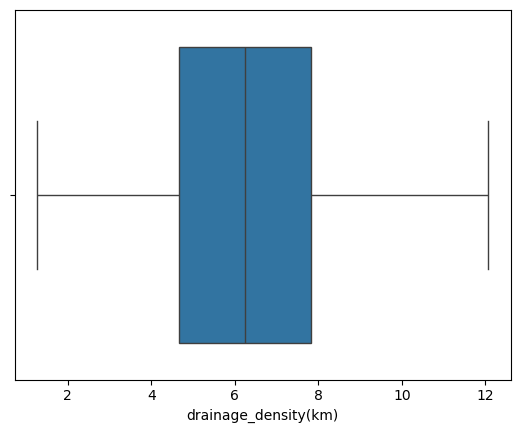

In [345]:
sns.boxplot(df,x='drainage_density(km)')

<Axes: xlabel='storm_drain_proximity_m'>

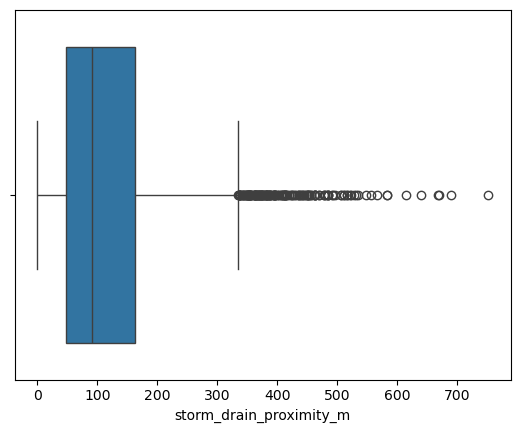

In [346]:
sns.boxplot(df,x='storm_drain_proximity_m')

<Axes: xlabel='elevation_m'>

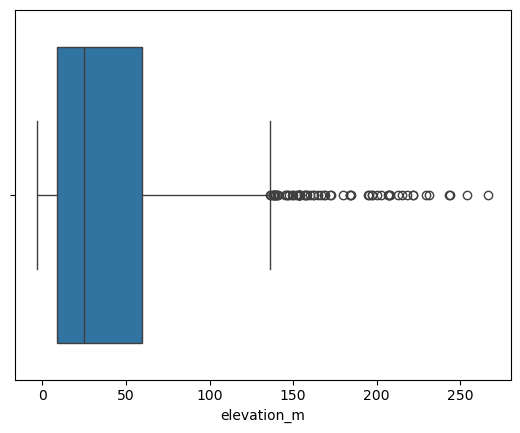

In [347]:
sns.boxplot(df,x='elevation_m')

In [348]:
df['drainage_density(km)']=df['drainage_density(km)'].fillna(df['drainage_density(km)'].mean())

In [349]:
for i in ['storm_drain_proximity_m','elevation_m']:
    df[i]=df[i].fillna(df[i].median())


In [350]:
for i in ['storm_drain_type','rainfall_source','soil_group']:
    df[i]=df[i].fillna(df[i].mode()[0])

In [351]:
df.isnull().sum()

segment_id                    0
city                          0
admin_ward                    0
latitude                      0
longitude                     0
catchment_id                  0
elevation_m                   0
dem_source                    0
land_use                      0
soil_group                    0
drainage_density(km)          0
storm_drain_proximity_m       0
storm_drain_type              0
rainfall_source               0
historical_rainfall(mm/hr)    0
return_period_years           0
risk_labels                   0
dtype: int64

In [352]:
df.head()

,segment_id,city,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,land_use,soil_group,drainage_density(km),storm_drain_proximity_m,storm_drain_type,rainfall_source,historical_rainfall(mm/hr),return_period_years,risk_labels
0,SEG-00001,"Colombo, Sri Lanka",Borough East,6.920633,79.912600,CAT-136,25.13,Copernicus_EEA-10_v5,Institutional,B,4.27,160.5,CurbInlet,ERA5,39.4,50,monitor
1,SEG-00002,"Chennai, India",Ward D,13.076487,80.281774,CAT-049,-2.19,Copernicus_EEA-10_v5,Residential,D,7.54,91.7,OpenChannel,ERA5,56.8,25,ponding_hotspot|low_lying|event_2025-05-02
2,SEG-00003,"Ahmedabad, India",Sector 12,23.019473,72.638578,CAT-023,30.88,SRTM_3arc,Industrial,B,11.00,152.5,OpenChannel,IMD,16.3,5,monitor
3,SEG-00004,"Hong Kong, China",Sector 14,22.302602,114.078673,CAT-168,24.28,SRTM_3arc,Residential,B,7.32,37.0,Manhole,ERA5,77.0,10,monitor
4,SEG-00005,"Durban, South Africa",Sector 5,-29.887602,30.911008,CAT-171,35.70,SRTM_3arc,Industrial,C,4.50,292.4,OpenChannel,ERA5,20.8,5,monitor


In [353]:
df['risk']=df['risk_labels'].str.split('|',expand=True)[0]

In [354]:
df['event_date']=df['risk_labels'].str.split('|',expand=True)[2]

In [355]:
df=df.drop(columns='risk_labels')

In [356]:
df.head()

,segment_id,city,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,land_use,soil_group,drainage_density(km),storm_drain_proximity_m,storm_drain_type,rainfall_source,historical_rainfall(mm/hr),return_period_years,risk,event_date
0,SEG-00001,"Colombo, Sri Lanka",Borough East,6.920633,79.912600,CAT-136,25.13,Copernicus_EEA-10_v5,Institutional,B,4.27,160.5,CurbInlet,ERA5,39.4,50,monitor,None
1,SEG-00002,"Chennai, India",Ward D,13.076487,80.281774,CAT-049,-2.19,Copernicus_EEA-10_v5,Residential,D,7.54,91.7,OpenChannel,ERA5,56.8,25,ponding_hotspot,event_2025-05-02
2,SEG-00003,"Ahmedabad, India",Sector 12,23.019473,72.638578,CAT-023,30.88,SRTM_3arc,Industrial,B,11.00,152.5,OpenChannel,IMD,16.3,5,monitor,None
3,SEG-00004,"Hong Kong, China",Sector 14,22.302602,114.078673,CAT-168,24.28,SRTM_3arc,Residential,B,7.32,37.0,Manhole,ERA5,77.0,10,monitor,None
4,SEG-00005,"Durban, South Africa",Sector 5,-29.887602,30.911008,CAT-171,35.70,SRTM_3arc,Industrial,C,4.50,292.4,OpenChannel,ERA5,20.8,5,monitor,None


In [357]:
df['event_date']=df['event_date'].fillna('unknown')

In [358]:
df['city']=df['city'].str.split(',',expand=True)[1]

In [359]:
df.head()

,segment_id,city,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,land_use,soil_group,drainage_density(km),storm_drain_proximity_m,storm_drain_type,rainfall_source,historical_rainfall(mm/hr),return_period_years,risk,event_date
0,SEG-00001,Sri Lanka,Borough East,6.920633,79.912600,CAT-136,25.13,Copernicus_EEA-10_v5,Institutional,B,4.27,160.5,CurbInlet,ERA5,39.4,50,monitor,unknown
1,SEG-00002,India,Ward D,13.076487,80.281774,CAT-049,-2.19,Copernicus_EEA-10_v5,Residential,D,7.54,91.7,OpenChannel,ERA5,56.8,25,ponding_hotspot,event_2025-05-02
2,SEG-00003,India,Sector 12,23.019473,72.638578,CAT-023,30.88,SRTM_3arc,Industrial,B,11.00,152.5,OpenChannel,IMD,16.3,5,monitor,unknown
3,SEG-00004,China,Sector 14,22.302602,114.078673,CAT-168,24.28,SRTM_3arc,Residential,B,7.32,37.0,Manhole,ERA5,77.0,10,monitor,unknown
4,SEG-00005,South Africa,Sector 5,-29.887602,30.911008,CAT-171,35.70,SRTM_3arc,Industrial,C,4.50,292.4,OpenChannel,ERA5,20.8,5,monitor,unknown


In [360]:
df.isnull().sum()

segment_id                    0
city                          0
admin_ward                    0
latitude                      0
longitude                     0
catchment_id                  0
elevation_m                   0
dem_source                    0
land_use                      0
soil_group                    0
drainage_density(km)          0
storm_drain_proximity_m       0
storm_drain_type              0
rainfall_source               0
historical_rainfall(mm/hr)    0
return_period_years           0
risk                          0
event_date                    0
dtype: int64

# Analysis

1. ----------------------------------------------------Dataset Basics-------------------------------------------------


How many total records are there in the dataset?

What are the different risk_labels?

How many segments fall under each risk label?

In [361]:
df.shape[0]

2963

In [362]:
df['risk'].unique()

array(['monitor', 'ponding_hotspot', 'extreme_rain_history', 'low_lying',
       'sparse_drainage'], dtype=object)

In [363]:
df.groupby('risk')['catchment_id'].value_counts().sort_values(ascending=False)

risk             catchment_id
monitor          CAT-012         22
                 CAT-070         20
                 CAT-001         19
                 CAT-038         19
                 CAT-054         19
                                 ..
low_lying        CAT-085          1
                 CAT-073          1
                 CAT-051          1
                 CAT-047          1
sparse_drainage  CAT-178          1
Name: count, Length: 667, dtype: int64

2. -------------------------------------------------Geography & Environment----------------------------------------------

Do low elevation areas have more flood risk than high elevation areas?

Which soil type (A–D) is most common in risky areas?

Which land use type (Residential, Industrial, Institutional) shows the highest flood risk?


In [364]:
df.head()

,segment_id,city,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,land_use,soil_group,drainage_density(km),storm_drain_proximity_m,storm_drain_type,rainfall_source,historical_rainfall(mm/hr),return_period_years,risk,event_date
0,SEG-00001,Sri Lanka,Borough East,6.920633,79.912600,CAT-136,25.13,Copernicus_EEA-10_v5,Institutional,B,4.27,160.5,CurbInlet,ERA5,39.4,50,monitor,unknown
1,SEG-00002,India,Ward D,13.076487,80.281774,CAT-049,-2.19,Copernicus_EEA-10_v5,Residential,D,7.54,91.7,OpenChannel,ERA5,56.8,25,ponding_hotspot,event_2025-05-02
2,SEG-00003,India,Sector 12,23.019473,72.638578,CAT-023,30.88,SRTM_3arc,Industrial,B,11.00,152.5,OpenChannel,IMD,16.3,5,monitor,unknown
3,SEG-00004,China,Sector 14,22.302602,114.078673,CAT-168,24.28,SRTM_3arc,Residential,B,7.32,37.0,Manhole,ERA5,77.0,10,monitor,unknown
4,SEG-00005,South Africa,Sector 5,-29.887602,30.911008,CAT-171,35.70,SRTM_3arc,Industrial,C,4.50,292.4,OpenChannel,ERA5,20.8,5,monitor,unknown


In [365]:
df['dem_source'].unique()

array(['Copernicus_EEA-10_v5', 'SRTM_3arc', 'Copernicus_GLO-30_v2023',
       'SRTM_1arc', 'Copernicus_GLO-90_v2022'], dtype=object)

In [366]:
df[['dem_source','soil_group']].value_counts().sort_values(ascending=False)

dem_source               soil_group
Copernicus_GLO-30_v2023  B             331
SRTM_1arc                B             287
Copernicus_GLO-30_v2023  C             233
SRTM_3arc                B             214
Copernicus_EEA-10_v5     B             183
SRTM_1arc                C             181
Copernicus_GLO-30_v2023  D             168
SRTM_1arc                D             161
                         A             154
Copernicus_GLO-30_v2023  A             137
SRTM_3arc                C             118
                         A             117
Copernicus_EEA-10_v5     C             116
                         D             105
SRTM_3arc                D             101
Copernicus_EEA-10_v5     A              96
Copernicus_GLO-90_v2022  B              94
                         C              65
                         D              59
                         A              43
Name: count, dtype: int64

In [367]:
df.groupby('risk')['land_use'].value_counts().sort_values(ascending=False).head(10)

risk             land_use   
monitor          Residential    535
                 Roads          417
                 Commercial     357
                 Industrial     257
                 Green          211
low_lying        Residential    119
                 Roads           88
                 Commercial      77
ponding_hotspot  Residential     73
monitor          Mixed           72
Name: count, dtype: int64

3. ------------------------------------------------Infrastructure------------------------------------------------

Are places closer to drains safer compared to those far away?

Which drain type (Open Channel, Manhole, Curb Inlet) is seen more in risky areas?


In [368]:
df['storm_drain_type'].value_counts()

storm_drain_type
CurbInlet      1021
Manhole         749
GratedInlet     644
OpenChannel     549
Name: count, dtype: int64

4. ------------------------------------------------Rainfall------------------------------------------------

Do areas with higher rainfall intensity face more flooding?

Does flood risk increase with longer return periods (5 vs 25 vs 50 years)?

In [369]:
df['rainfall_source'].value_counts()

rainfall_source
ERA5          1649
LocalGauge     502
Blended        445
IMD            367
Name: count, dtype: int64

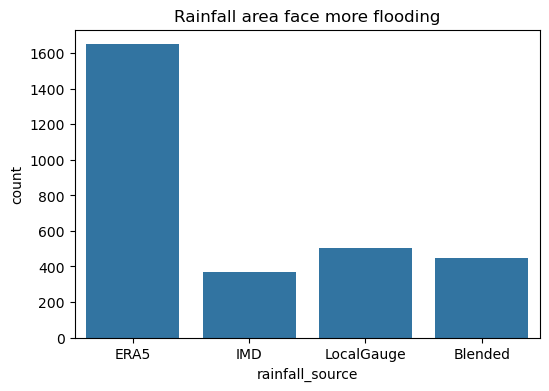

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(df,x='rainfall_source')
plt.title('Rainfall area face more flooding')
plt.show()

**ERA5 rainfall area faced more flooding risk**

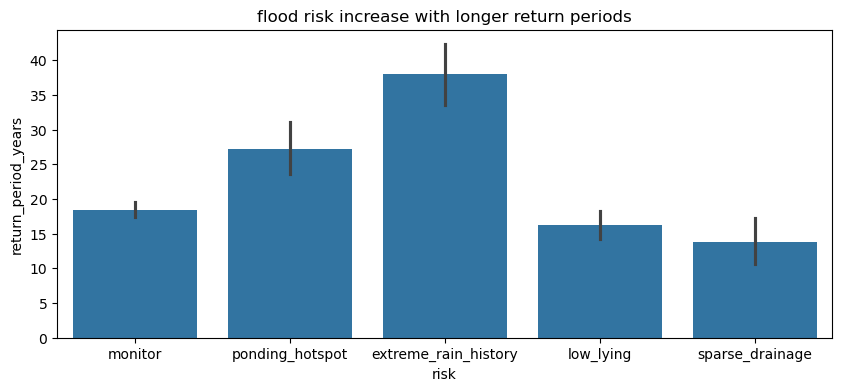

In [371]:
plt.figure(figsize=(10,4))
sns.barplot(df,x='risk',y='return_period_years')
plt.title('flood risk increase with longer return periods')
plt.show()

**we can see that longer return period like 35-40 years extreme rain history risk higer compared to monitor,ponding,hotspot,low lying**

5. ------------------------------------------------Location Insights------------------------------------------------

Which city has the highest number of flood hotspots?

Within a city, which wards are most affected?

In [377]:
flood_hotspot=df.query("risk=='ponding_hotspot'")['city'].value_counts().head(5)
flood_hotspot

city
India          33
China          23
USA            20
Philippines    13
Singapore      12
Name: count, dtype: int64

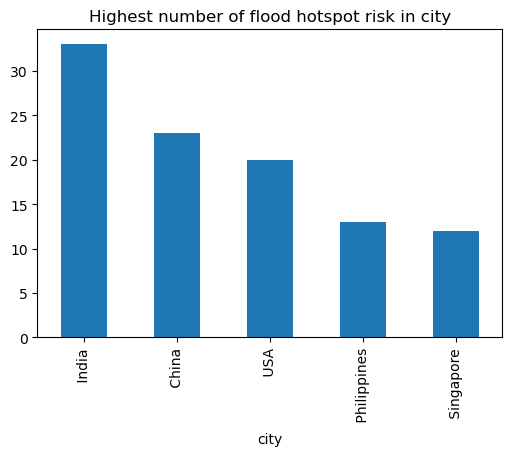

In [379]:
plt.figure(figsize=(6,4))
flood_hotspot.plot(kind='bar')
plt.title('Highest number of flood hotspot risk in city')
plt.show()

**In india risk of flooding hotspot highest compared to china,USA**

In [388]:
df.groupby('city')['admin_ward'].value_counts().sort_values(ascending=False).head(10)

city   admin_ward       
USA    Zone V               13
India  Ward H               12
USA    Borough Hillside     12
       Borough West         11
India  Borough Delta        11
       Ward E               11
       Zone I               11
       Borough West         10
USA    Zone VI              10
       Borough Riverside    10
Name: count, dtype: int64

**USA, Zone v admin_ward most affected**

6.------------------------------------------------Combined Factors & Trends------------------------------------------------

Which 2–3 factors combined (e.g., low elevation + residential + high rainfall) appear most often in risky areas?

What patterns or trends can be seen in the dataset overall?

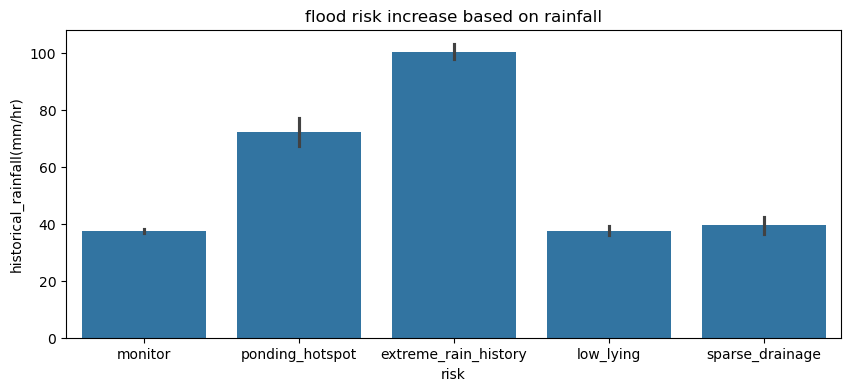

In [394]:
plt.figure(figsize=(10,4))
sns.barplot(df,x='risk',y='historical_rainfall(mm/hr)')
plt.title('flood risk increase based on rainfall')
plt.show()

7.------------------------------------------------Decision & Action------------------------------------------------

Which areas (or regions) are at highest risk of flooding?

Which locations must be prioritized for flood prevention measures?

Which areas are safest for new houses or infrastructure?

Which villages/towns need early flood warning systems immediately?

Should resources (funds, manpower) be focused on high rainfall zones, clay soil regions, or urbanized areas?

What is the top recommendation for reducing flood risk in this region?

In [395]:
df.head(3)

,segment_id,city,admin_ward,latitude,longitude,catchment_id,elevation_m,dem_source,land_use,soil_group,drainage_density(km),storm_drain_proximity_m,storm_drain_type,rainfall_source,historical_rainfall(mm/hr),return_period_years,risk,event_date
0,SEG-00001,Sri Lanka,Borough East,6.920633,79.912600,CAT-136,25.13,Copernicus_EEA-10_v5,Institutional,B,4.27,160.5,CurbInlet,ERA5,39.4,50,monitor,unknown
1,SEG-00002,India,Ward D,13.076487,80.281774,CAT-049,-2.19,Copernicus_EEA-10_v5,Residential,D,7.54,91.7,OpenChannel,ERA5,56.8,25,ponding_hotspot,event_2025-05-02
2,SEG-00003,India,Sector 12,23.019473,72.638578,CAT-023,30.88,SRTM_3arc,Industrial,B,11.00,152.5,OpenChannel,IMD,16.3,5,monitor,unknown


In [399]:
df['catchment_id'].value_counts().head()

catchment_id
CAT-012    28
CAT-163    27
CAT-005    26
CAT-038    26
CAT-091    25
Name: count, dtype: int64

In [400]:
df['city'].value_counts().head()

city
India           375
USA             363
China           158
South Africa    104
Netherlands     104
Name: count, dtype: int64

**Conclusion: ERA5 rainfall area faced more flooding risk,In India  flooding risk was higer compared to USA because for extreme rainfall and also based on CurbInlet storm drain type.residensial area was most affected**